In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Discussion: Week 3

In [2]:
# Import the Pandas module as pd
import pandas as pd


## Exercise: Statistics on Cross-Country Income per Capita

Objectives:

1. Import and manage cross-country GDP per capita data
2. Construct plots using imported data

For this exercise, we'll make use of a file called `crossCountryIncomePerCapita.csv` from: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-income/csv/cross_country_income_per_capita.csv (Python code to generate the dataset: https://github.com/letsgoexploring/economic-data).

### Part (a): Import Data and Inspect the `DataFrame`

In the first part of the exercise, you will import the dataset and use some basic Pandas operations to explore some properties of the `DataFrame` that you create. The csv file that you import has years in the leftmost column (i.e., pass `index_col=0` to `pd.read_csv`). Pass the optional argument `parse_dates=True` to `pd.read_csv()` so that Pandas interprets the year numbers as dates. This is handy for graphing, among other things.

In [3]:
# Import the cross-country GDP data into a DataFrame called 'income_df' with arguments index_col=0 and parse_dates=True
income_df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-income/csv/cross_country_income_per_capita.csv',index_col=0,parse_dates=True)

# Print the first five rows of income_df
print(income_df.head())

            Argentina - ARG  Australia - AUS  Austria - AUT  Burundi - BDI  \
year                                                                         
1960-01-01       2852.36814      14469.70763     9373.30809      623.95226   
1961-01-01       2948.91414      14408.61680     9881.99860      527.68664   
1962-01-01       2763.65938      14922.77997    10101.58860      560.87956   
1963-01-01       2686.87439      15869.71131    10463.35528      566.32799   
1964-01-01       2816.49064      16249.47678    10890.84552      566.04350   

            Belgium - BEL  Benin - BEN  Burkina Faso - BFA  Bangladesh - BGD  \
year                                                                           
1960-01-01    10373.94836   1428.41037           659.39167        1496.44287   
1961-01-01    10770.04477   1434.82911           646.34152        1477.21858   
1962-01-01    11239.29355   1351.50983           694.97138        1541.77356   
1963-01-01    11513.83833   1381.32620           665.

In [4]:
# Print the columns attribute of income_df
print(income_df.columns)

Index(['Argentina - ARG', 'Australia - AUS', 'Austria - AUT', 'Burundi - BDI',
       'Belgium - BEL', 'Benin - BEN', 'Burkina Faso - BFA',
       'Bangladesh - BGD', 'Bolivia (Plurinational State of) - BOL',
       'Brazil - BRA',
       ...
       'Turkey - TUR', 'Taiwan - TWN', 'U.R. of Tanzania: Mainland - TZA',
       'Uganda - UGA', 'Uruguay - URY', 'United States - USA',
       'Venezuela (Bolivarian Republic of) - VEN', 'South Africa - ZAF',
       'Zambia - ZMB', 'Zimbabwe - ZWE'],
      dtype='object', length=111)


The `len()` function is a built-in Python function for determining the length of objects that can be iterated upon (e.g., lists, strings, NumPy arrays). For example, the following code creates a variable `x` equal to a four-element list and prints the length of `x`:

    x = [1,2,3,4]
    print(len(x))
    
The code will print a value of 4 to the screen.

In [5]:
# Print the number of countries in income_df (i.e., print the length of income_df.columns)
print(len(income_df.columns))

111


In [6]:
# Print the index attribute of income_df
print(income_df.index)

DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
      

In [7]:
# Print the number of years of data in income_df (i.e., print the length of income_df.index)
print(len(income_df.index))

58


In [8]:
# Print the first five rows of the 'United States - USA' column of income_df
print(income_df['United States - USA'].head())

year
1960-01-01    17591.95693
1961-01-01    17738.84036
1962-01-01    18500.73556
1963-01-01    18992.99633
1964-01-01    19791.67712
Name: United States - USA, dtype: float64


In [9]:
# Print the last five rows of the 'United States - USA' column of income_df
print(income_df['United States - USA'].tail())

year
2013-01-01    51563.37099
2014-01-01    52630.54634
2015-01-01    53888.95945
2016-01-01    54309.26173
2017-01-01    55256.73778
Name: United States - USA, dtype: float64


In [10]:
# Print the last value in the 'United States - USA' column of income_df
print('GDP per capital for the US in '+str(income_df.index[-1])[:4]+':',round(income_df.iloc[-1]['United States - USA']))

GDP per capital for the US in 2017: 55257.0


### Part (b): Construct Two Plots

In [11]:
# Register Pandas datetime converter with matplotlib. PROVIDED
pd.plotting.register_matplotlib_converters()

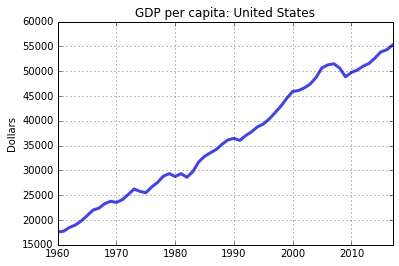

In [12]:
# Create a line plot of gdp per capita for the US with income_df.index as the x-axis coordinates with:
#     1. Set linewidth to 3 and opacity (alpha) to 0.75
#     2. Set y-axis label to 'Dollars'
#     3. Set title to 'GDP per capita: United States')
#     4. Add a grid if you want to
plt.plot(income_df.index,income_df['United States - USA'],lw=3,alpha = 0.75)
plt.ylabel('Dollars')
plt.title('GDP per capita: United States')
plt.grid()

You can use the `DataFrame` method `filter()` to exclude columns or rows that *don't* match specified criteria. This is useful for searching over columns (or rows) if you're not sure about the contents. For example, suppose that we want to select the column for Equatorial Guinea from `income_df`, but we're not sure what the abbreviation is. We can run:

    income_df.filter(like='Guinea').columns
    
which returns:

    Index(['Guinea - GIN', 'Guinea-Bissau - GNB', 'Equatorial Guinea - GNQ'], dtype='object')
    
So now it's apparent that `'Equatorial Guinea - GNQ'` is the name of the column with data for Equatorial Guinea.

In [13]:
# Use the example described above to find the column name for any country you like
country = income_df.filter(like='Bolivia').columns.values[0]
print(country)

Bolivia (Plurinational State of) - BOL


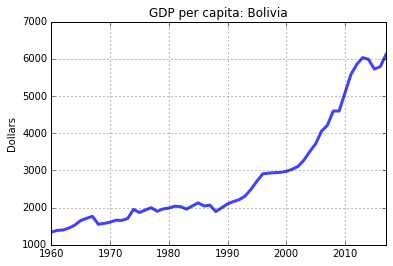

In [14]:
# Create a line plot of gdp per capita for the country that you picked wtih income_df.index as the x-axis coordinates and:
#     1. Set linewidth to 3 and opacity (alpha) to 0.75
#     2. Set y-axis label to 'Dollars'
#     3. Set title to 'GDP per capita: COUNTRY NAME')
#     4. Add a grid if you want to
plt.plot(income_df.index,income_df[country],lw=3,alpha = 0.75)
plt.ylabel('Dollars')
plt.title('GDP per capita: '+country.split(" ")[0])
plt.grid()

**Question**

1. Describe in words any similarities and/or differences you see between the paths of GDP per capita in the US and GDP per capita in the country that you picked.

**Answer**

1. Over the entire data range, the GDP per capita of Bolivia is at least an order of magnitude lower than the GDP per capita of the US. However, beginning in the early 2000s, growth in GDP per capita in Bolivia accelerated substantially and this was not mirrored in the US data.<!-- answer -->